# Ejemplo de análisis de los datos utilizando la longitud de siete especies
## Bitácora hecha con R

In [2]:
# leer el archivo con la información. Tiene el formato de comas (valores separados por comas)
morfo <-read.csv("~/Desktop/data/morfo/7sppMorfo_largototal.csv", header = TRUE)

In [3]:
# Muestra los primeros 5 valores
head(morfo) 

especie,org,long_total
especie1,1,100
especie1,2,89
especie1,3,114
especie1,4,88
especie1,5,124
especie1,12,101


In [4]:
# Carga los paquetes correspondinetes.
library(psych)
library(ggplot2)
library(car)
library(gplots)
library(corrplot)
library(devtools)
library(devtools)
library(ggbiplot)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha


Attaching package: 'car'

The following object is masked from 'package:psych':

    logit


Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

corrplot 0.84 loaded
Loading required package: plyr
Loading required package: scales

Attaching package: 'scales'

The following objects are masked from 'package:psych':

    alpha, rescale

Loading required package: grid


In [5]:
# el PCA se tomó de
#https://stats.idre.ucla.edu/r/faq/how-can-i-get-a-table-of-basic-descriptive-statistics-for-my-variables/
#install.packages("pastecs", dependencies=TRUE, repos='http://cran.us.r-project.org')
library(pastecs)

In [6]:
options(scipen=100)
options(digits=2)

# Estadistica descriptiva para todas las variables 

In [7]:
stat.desc(morfo)

,especie,org,long_total
nbr.val,NA,367.00,367.00
nbr.null,NA,0.00,0.00
nbr.na,NA,0.00,0.00
min,NA,1.00,65.00
max,NA,100.00,320.00
range,NA,99.00,255.00
sum,NA,14772.00,41324.00
median,NA,36.00,97.00
mean,NA,40.25,112.60
SE.mean,NA,1.49,2.41


## qué comando usaría para que solo diera los valores de la longitud total?

In [8]:
stat.desc(morfo[3])

,long_total
nbr.val,367.00
nbr.null,0.00
nbr.na,0.00
min,65.00
max,320.00
range,255.00
sum,41324.00
median,97.00
mean,112.60
SE.mean,2.41


# otra forma de obtener la estadística descriptiva

In [9]:
describe(morfo[3])

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,367,113,46,97,104,30,65,320,255,1.9,3.5,2.4


# Observe que hay información diferente en cada una de las salidas

# Se puede obtener la estadística básica 

In [10]:
stat.desc(morfo[3], basic = F)

,long_total
median,97.00
mean,112.60
SE.mean,2.41
CI.mean.0.95,4.73
var,2125.39
std.dev,46.10
coef.var,0.41


# descripcion por las especies, esta información es más útil, en este caso

In [11]:
describeBy(morfo[3], group=morfo$especie, digits=15, mat = T)

,item,group1,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X11,1,especie1,1,92,125,29,120,120,14.1,87,240,153,1.90,3.76,3.1
X12,2,especie2,1,12,132,26,136,132,28.9,95,166,71,-0.12,-1.83,7.4
X13,3,especie3,1,40,191,58,204,187,44.5,100,320,220,0.26,-0.65,9.2
X14,4,especie4,1,92,86,11,83,84,7.4,70,130,60,1.68,3.39,1.2
X15,5,especie5,1,12,127,15,128,128,13.3,99,150,51,-0.15,-0.94,4.5
X16,6,especie6,1,19,167,51,148,164,41.5,117,274,157,0.81,-0.78,11.7
X17,7,especie7,1,100,80,8,81,80,9.6,65,102,37,0.18,-0.64,0.8


# Qué pasa si no se utiliza el comando `mat = T`

# Graficado de los promedios por especie

Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(x, li, x, pmax(y - gap, li), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"Warning message in arrows(x, ui, x, pmin(y + gap, ui), col = barcol, lwd = lwd, :
"zero-length arrow is of indeterminate angle and so skipped"

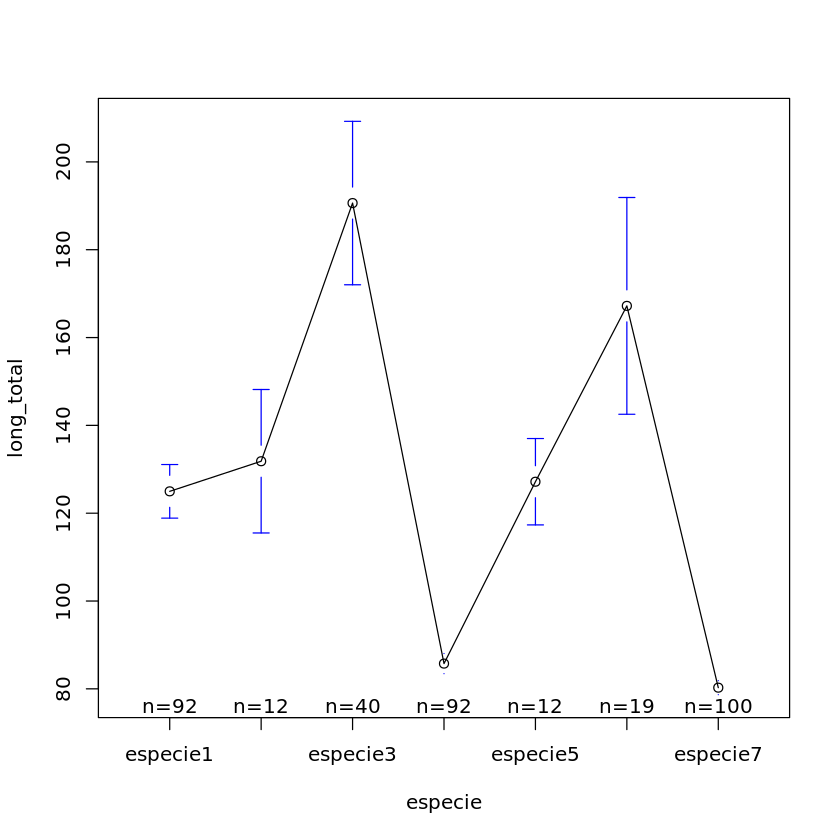

In [12]:
attach(morfo)
plotmeans(long_total ~especie)

## para qué sirve el comando `attach(morfo)`?

# Análsis de varianza para determinar diferencias

In [13]:
longitudtotal_anova <- aov(long_total ~especie)
summary (longitudtotal_anova)

             Df Sum Sq Mean Sq F value              Pr(>F)    
especie       6 492109   82018     103 <0.0000000000000002 ***
Residuals   360 285785     794                                
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [14]:
bartlett.test(long_total ~especie)


	Bartlett test of homogeneity of variances

data:  long_total by especie
Bartlett's K-squared = 300, df = 6, p-value <0.0000000000000002


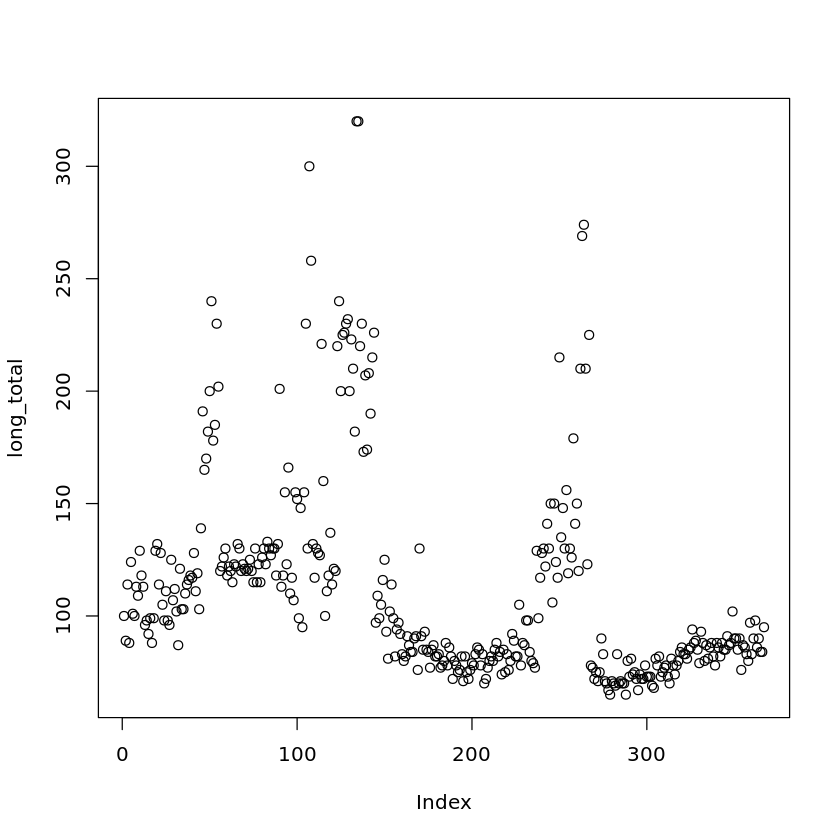

In [15]:
plot(long_total)

# Escriba sus conclusiones

# Gráficas 

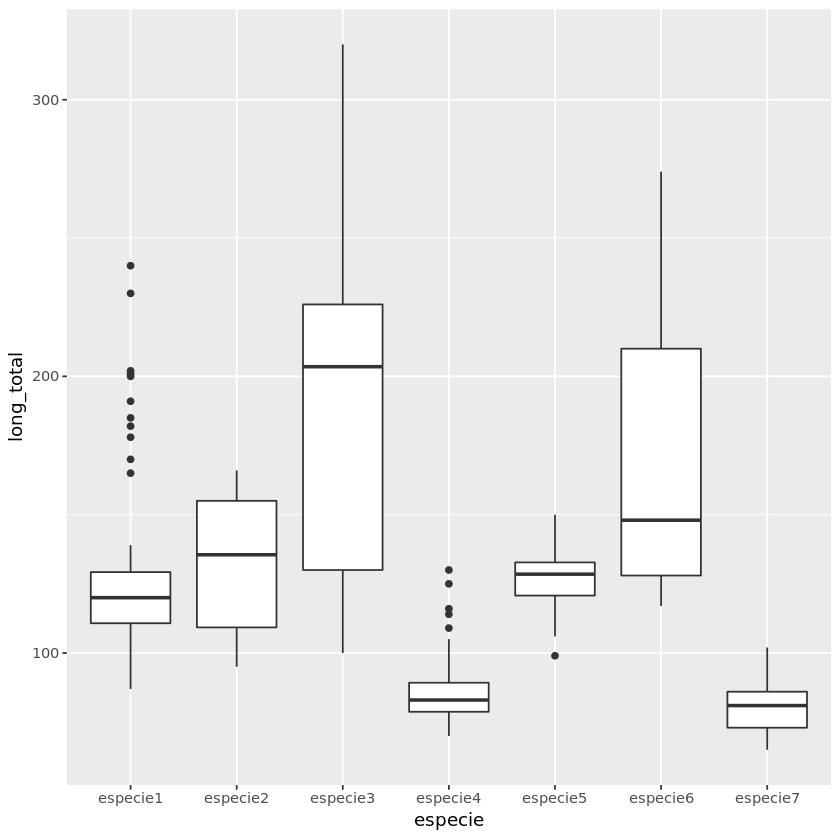

In [16]:
ggplot(morfo, aes(x=especie, y=long_total)) + geom_boxplot()

# Para guardar las imágenes obtenidas con ggplot se puede usar

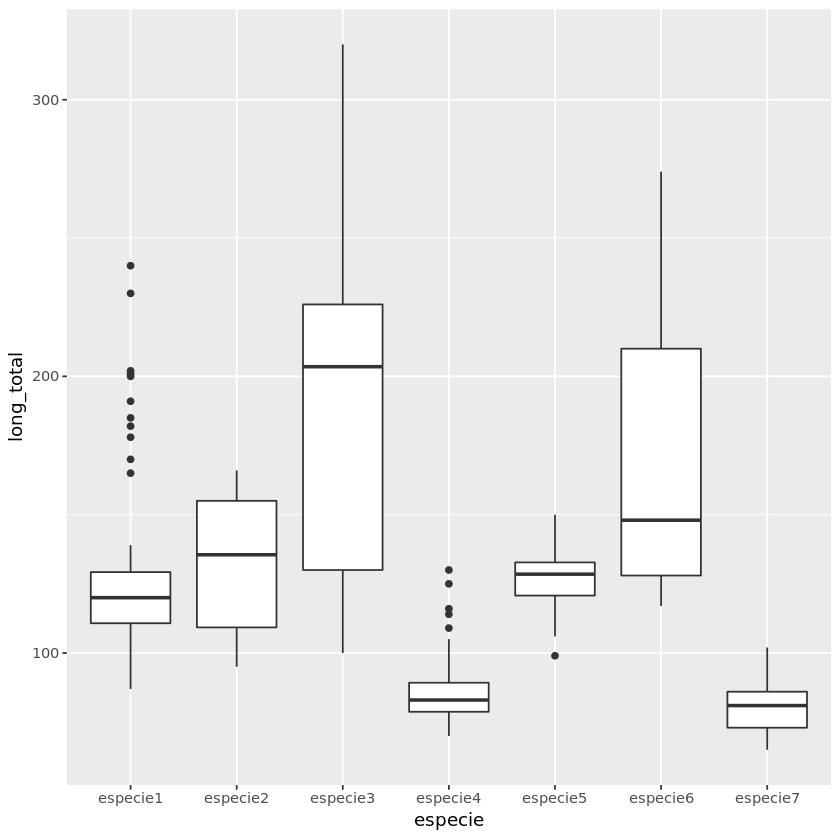

In [17]:
ggplot(morfo, aes(x=especie, y=long_total)) + geom_boxplot()
ggsave("img/morfo_longtotal.png", width = 6, height = 6)

# Escriba qué es lo que aprendió en esta bitácora y en qué le podría ayudar en su trabajo, sea tan explícito como le sea posible